In [40]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, Concatenate
from tensorflow.keras.models import Model

In [2]:
# pip install tqdm -> progressbar 
from tqdm import tqdm

In [3]:
categories = ['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.electronics']

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, categories=categories)

print(newsgroups_train.target_names)
print(len(newsgroups_train.data))

['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.electronics']
1767


In [4]:
# print(newsgroups_train.data[0])
print(newsgroups_train.data[0].split("\n")[10:15])

[': |> In article <2514@tekgen.bv.tek.com> davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:', ': |> >In article <1993Apr15.171757.10890@i88.isc.com> jeq@lachman.com (Jonathan E. Quist) writes:', ': |> >>Rolls-Royce owned by a non-British firm?', ': |> >>', ': |> >>Ye Gods, that would be the end of civilization as we know it.']


In [5]:
print(newsgroups_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
print(len(newsgroups_train.data))
print(len(newsgroups_train.filenames))
print(len(newsgroups_train.target_names))
print(len(newsgroups_train.target))

1767
1767
3
1767


In [7]:
print(newsgroups_train.target_names)

['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.electronics']


In [8]:
newsgroups_train.data[0]

'From: npet@bnr.ca (Nick Pettefar)\nSubject: Re: Happy Easter!\nNntp-Posting-Host: bmdhh299\nOrganization: BNR Europe Ltd, Maidenhead, UK\nX-Newsreader: TIN [version 1.1 PL8]\nLines: 37\n\nkevinh, on the Tue, 20 Apr 1993 13:23:01 GMT wibbled:\n\n: In article <1993Apr19.154020.24818@i88.isc.com>, jeq@lachman.com (Jonathan E. Quist) writes:\n: |> In article <2514@tekgen.bv.tek.com> davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:\n: |> >In article <1993Apr15.171757.10890@i88.isc.com> jeq@lachman.com (Jonathan E. Quist) writes:\n: |> >>Rolls-Royce owned by a non-British firm?\n: |> >>\n: |> >>Ye Gods, that would be the end of civilization as we know it.\n: |> >\n: |> >  Why not?  Ford owns Aston-Martin and Jaguar, General Motors owns Lotus\n: |> >and Vauxhall.  Rover is only owned 20% by Honda.\n: |> \n: |> Yes, it\'s a minor blasphemy that U.S. companies would ?? on the likes of A.M.,\n: |> Jaguar, or (sob) Lotus.  It\'s outright sacrilege for RR to have non-British\n: |> ownership

In [9]:
%%time
labels = newsgroups_train.target
texts = newsgroups_train.data

MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 1000

tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

CPU times: user 418 ms, sys: 11.2 ms, total: 429 ms
Wall time: 433 ms


In [10]:
print(sequences[0][:10])
print(texts[0])

[12, 1265, 270, 70, 769, 1233, 20, 33, 1207, 4237]
From: npet@bnr.ca (Nick Pettefar)
Subject: Re: Happy Easter!
Nntp-Posting-Host: bmdhh299
Organization: BNR Europe Ltd, Maidenhead, UK
X-Newsreader: TIN [version 1.1 PL8]
Lines: 37

kevinh, on the Tue, 20 Apr 1993 13:23:01 GMT wibbled:

: In article <1993Apr19.154020.24818@i88.isc.com>, jeq@lachman.com (Jonathan E. Quist) writes:
: |> In article <2514@tekgen.bv.tek.com> davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:
: |> >In article <1993Apr15.171757.10890@i88.isc.com> jeq@lachman.com (Jonathan E. Quist) writes:
: |> >>Rolls-Royce owned by a non-British firm?
: |> >>
: |> >>Ye Gods, that would be the end of civilization as we know it.
: |> >
: |> >  Why not?  Ford owns Aston-Martin and Jaguar, General Motors owns Lotus
: |> >and Vauxhall.  Rover is only owned 20% by Honda.
: |> 
: |> Yes, it's a minor blasphemy that U.S. companies would ?? on the likes of A.M.,
: |> Jaguar, or (sob) Lotus.  It's outright sacrilege for RR to have

In [11]:
word_index = tokenizer.word_index
print("Unique tokens:", len(word_index))

Unique tokens: 25458


In [12]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [13]:
print(data.shape)
print(data[0][680:730])

(1767, 1000)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   12 1265  270   70  769 1233   20   33 1207
 4237   52   47   49 3173   25  270 2009  999 1735  146  107  402  471
  238   34   34 1052   21 1390 3928   15]


In [14]:
labels = to_categorical(np.array(labels))
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [15]:
print('Data shape:', data.shape)
print('Label shape:', labels.shape)

Data shape: (1767, 1000)
Label shape: (1767, 3)


In [16]:
VALIDATION_SPLIT = 0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices] 
labels = labels[indices] 
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples] 
y_train = labels[:-nb_validation_samples] 
x_val = data[-nb_validation_samples:] 
y_val = labels[-nb_validation_samples:] 

print (x_train.shape)
print (y_train.shape)

print('Number of catrgories in traing and validation set ') 
print (y_train.sum(axis=0))
print (y_val.sum(axis=0))


(1414, 1000)
(1414, 3)
Number of catrgories in traing and validation set 
[461. 468. 485.]
[117. 130. 106.]


In [19]:
%%time 
embeddings_index = {}

f = open('./dataset/glove.6B.100d.txt')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print("Words vectors:", len(embeddings_index))

400000it [00:08, 49788.08it/s]

Words vectors: 400000
CPU times: user 7.26 s, sys: 479 ms, total: 7.74 s
Wall time: 8.06 s


In [20]:
EMBEDDING_DIM = 100

In [26]:
embedding_matrix = np.random.random( (len(word_index) + 1, EMBEDDING_DIM) )

In [27]:
embedding_matrix

array([[0.50024465, 0.80388921, 0.5931984 , ..., 0.58787749, 0.93015188,
        0.97405285],
       [0.00253457, 0.1729329 , 0.45253544, ..., 0.34453786, 0.71583253,
        0.72815242],
       [0.88704943, 0.96022487, 0.76463734, ..., 0.13395752, 0.64692382,
        0.07377387],
       ...,
       [0.28304469, 0.90273375, 0.1349464 , ..., 0.58143097, 0.86816391,
        0.30353272],
       [0.63207368, 0.412328  , 0.0576017 , ..., 0.55340145, 0.47612609,
        0.57795033],
       [0.38626378, 0.71862963, 0.47176804, ..., 0.54557464, 0.15396644,
        0.6526379 ]])

In [29]:
for word, i in word_index.items():
    # embedding 된 단어를 glove.6B.100d에 존재하는지 검색
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector # glove.6B.100d의 벡터값을 embedding 단어에 지정

print(embedding_matrix.shape)

(25459, 100)


In [31]:
print(embedding_matrix[0][:10])

[0.50024465 0.80388921 0.5931984  0.82773873 0.35177734 0.4331415
 0.35163963 0.26012097 0.64284493 0.22444825]


In [ ]:
# Generate a model
convs = []
filter_sizes = [3,4,5]

embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM,
                           weights=[embedding_matrix],
                           input_length=MAX_SEQUENCE_LENGTH,
                           trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# RNN, LSTM, GRU 
# DNN 
for filter_size in filter_sizes:
    conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(5)(conv)
    convs.append(pool)

merged_convs = Concatenate(axis=1)(convs)

conv1 = Conv1D(128, 5, activation='relu')(merged_convs)
pool1 = MaxPooling1D(5)(conv1)
conv2 = Conv1D(128, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(5)(conv2)
flat = Flatten()(pool2)
dense = Dense(128, activation='relu')(flat)
preds = Dense(3, activation='softmax')(dense)

model = Model(sequence_input, preds)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()
    

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

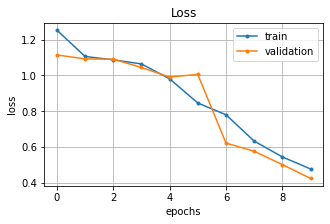

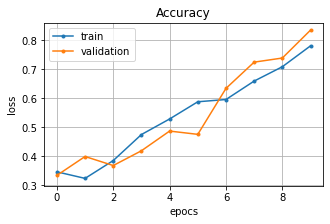

In [41]:
plt.figure(figsize=(5,3))
plt.plot(r.history['loss'], marker='.', label='train')
plt.plot(r.history['val_loss'], marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(r.history['acc'], marker='.', label='train')
plt.plot(r.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epocs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()